<a href="https://colab.research.google.com/github/suryakunju/prompts/blob/main/JHU_AgenticAI_MLS2_Prompt_Engineering_Fundamentals_HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

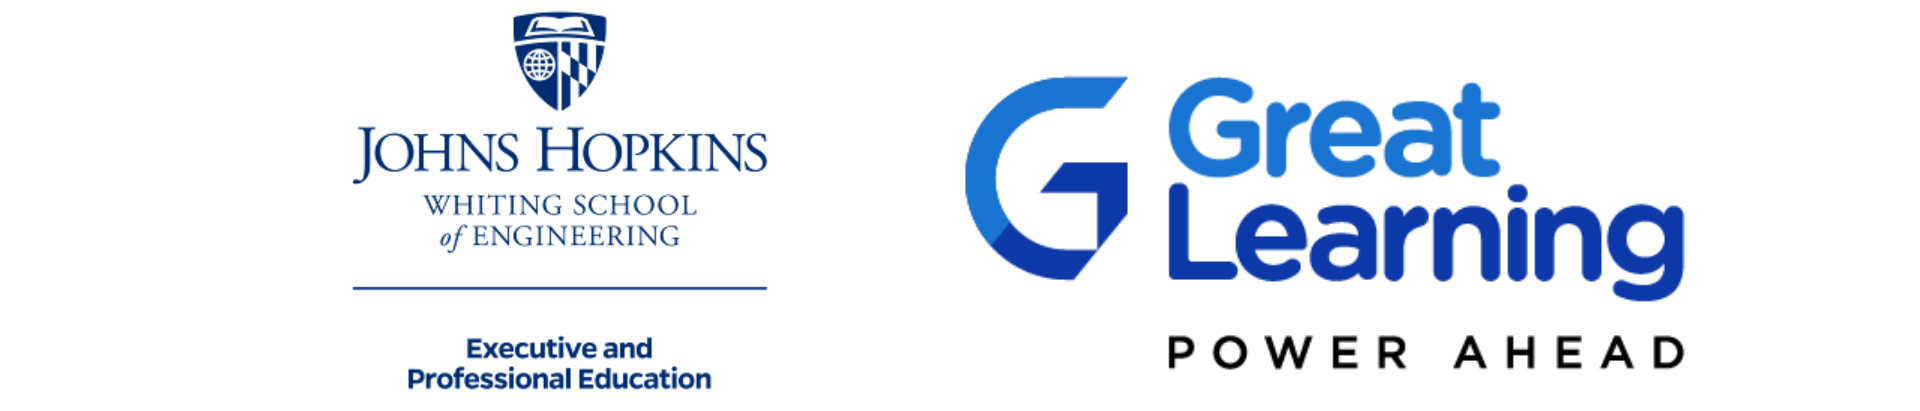


# **Prompt Engineering Fundamentals**

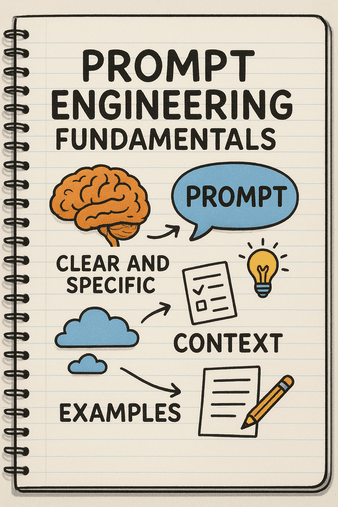

# **Business Context**

TechFast, a leading AI technology solutions provider, specializes in leveraging AI to improve business operations across various industries. TechFast is exploring the potential of a language model, to automate and enhance several business processes. By demonstrating the principles of Prompt Engineering, TechFast aims to explore how tailored prompts can yield specific, actionable outputs for diverse business-focused use cases.

# **Objective**


The objective of this case study is to demonstrate the effectiveness of Prompt Engineering with LLMs by creating and utilizing varied prompts to address multiple business needs. This will illustrate how precise and contextually appropriate prompts can generate high-quality, relevant outputs that improve operational efficiency and decision-making. The specific use cases covered in this study include:

1. **Customer Review Analysis:** Extracting and summarizing key information from customer reviews to understand sentiments, identify common issues, and highlight positive feedback.

2. **Meeting Notes Summarizer:** Automatically summarizing meeting notes to capture essential points, action items, and decisions, ensuring efficient information dissemination.

3. **Quiz Generator:** Creating quizzes based on provided content to aid in training and educational initiatives, ensuring comprehension and engagement.

4. **Slide Script Generator:** Generating scripts for presentation slides to help presenters deliver coherent and well-structured talks.

5. **Complaint Response Generator:** Crafting professional and empathetic responses to customer complaints, ensuring issues are addressed promptly and satisfactorily.In this notebook, we will attempt to demonstrate the principles of Prompt Engineering by giving varied prompts to Falcon3-1B-Instruct to obtain outputs that fulfill a variety of business-focused use cases.

# **Installating and Importing the Necessary Libraies**

In [7]:
! pip install langchain \
              transformers \
              langchain-huggingface

In [8]:
from langchain_huggingface import HuggingFacePipeline
from transformers import pipeline

# Load the model using Hugging Face pipeline
hf_pipeline = pipeline(
    "text-generation",
    model="tiiuae/Falcon3-1B-Instruct",
    device=0,  # Use GPU (-1 for CPU)
    max_new_tokens = 500,
    return_full_text=False
)

# Create the LangChain LLM using the HuggingFace pipeline
llm = HuggingFacePipeline(pipeline=hf_pipeline)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.34G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

Device set to use cuda:0


Hugging Face models are typically downloaded and cached in a specific directory on your system. This allows the models to be reused without re-downloading them every time you run your code.

The default cache directory is usually located at `~/.cache/huggingface/hub` on Linux/macOS and `C:\Users\YourUser\.cache\huggingface\hub` on Windows.

However, you can also check the `HF_HOME` environment variable, which can override this default location. If `HF_HOME` is set, the cache will be located there. If you're running this in a Colab environment, it will be within the Colab instance's filesystem.

You can verify the exact location in a Python environment using the following code:

**Model Check**

Let's test the model using a basic question on Photosynthesis to check the result!

In [ ]:
# Example usage:
user_input = "How does photosynthesis work?"
response = llm.invoke(user_input)
print(response)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


**
   - **Answer:** Photosynthesis is the process by which plants, algae, and some bacteria convert light energy, usually from the sun, into chemical energy stored in glucose. This process occurs in the chloroplasts of plant cells and involves two main stages: the light-dependent reactions and the light-independent reactions (Calvin cycle). During the light-dependent reactions, light energy is absorbed by chlorophyll and converted into chemical energy in the form of ATP and NADPH. These energy-rich molecules are then used in the light-independent reactions to fix carbon dioxide into glucose, using the energy from ATP and NADPH.

2. **What is the significance of the Calvin cycle in photosynthesis?**
   - **Answer:** The Calvin cycle, also known as the light-independent reactions, is crucial because it is the site where carbon dioxide is fixed into organic molecules, such as glucose. This cycle occurs in the stroma of the chloroplasts and involves a series of enzyme-catalyzed reactions. 

# **Caselet 1: Customer Feedback Analysis**

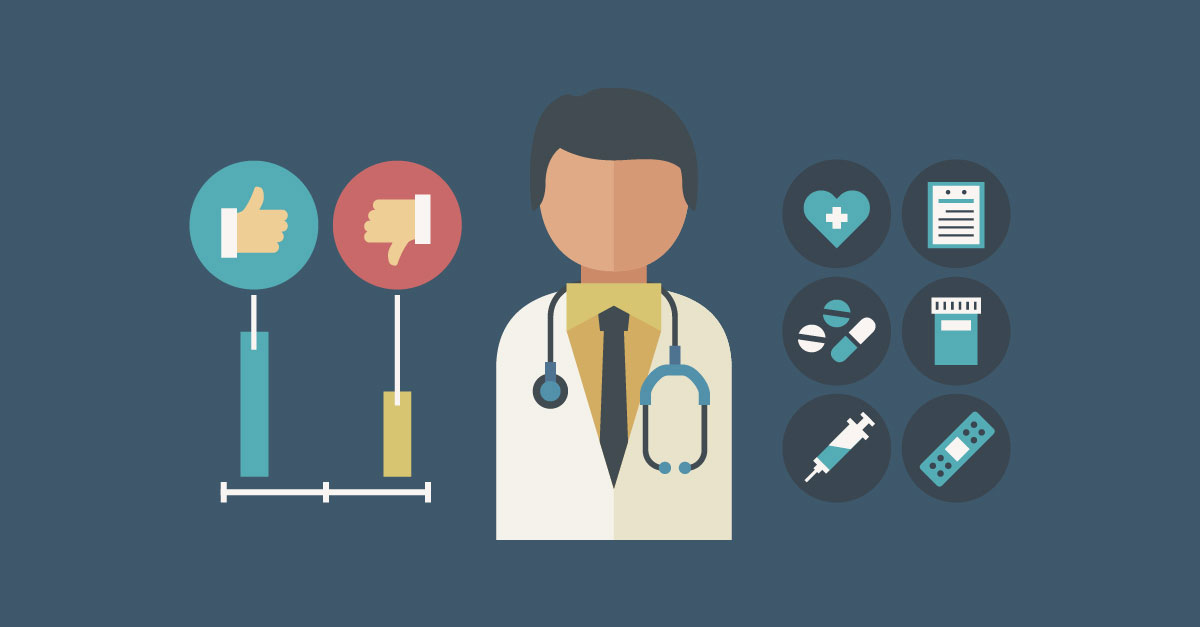

**Scenario:**

TechFast has a medical services client that receives numerous customer reviews daily. To gain actionable insights, the client aims to automatically analyze these reviews to identify key entities, sentiments, and common issues.

In [ ]:
# Example 1
data_1 ='''John Smith - I recently had the privilege of consulting with Dr. Emily Roberts, a board-certified Family Physician,
 and I must say it was an exceptional experience. From start to finish, everything about my visit was top-notch, and I couldn't
 be more satisfied with the care I received. Dr. Roberts' credentials and professionalism were immediately evident.
 Her warm and welcoming demeanor put me at ease right away. She took the time to listen attentively to my concerns,
 showing genuine empathy and understanding. This made me feel like more than just a patient; I felt like a valued individual whose health
 truly mattered. What stood out to me the most was Dr. Roberts' comprehensive knowledge and expertise. She asked detailed questions to get
 a full understanding of my medical history, and her diagnosis and treatment recommendations were both thorough and easy to understand.
 It was evident that she had a deep understanding of the latest medical advancements and treatment options. Throughout the consultation,
 Dr. Roberts maintained excellent communication. She explained each step of the diagnostic process and the rationale behind her recommendations.
 I appreciated how she encouraged questions and took the time to address all of my concerns, ensuring that I was well-informed and actively
involved in my healthcare decisions. Moreover, the clinic itself was well-organized and clean, which further enhanced the overall experience.
The support staff were courteous and efficient, contributing to a seamless visit. In the end, my experience with Dr. Emily Roberts was nothing short
 of outstanding. Her compassionate approach to patient care, coupled with her extensive medical knowledge, left me feeling confident
 in the treatment plan she devised. Thanks to her, I am now on the path to recovery, and I couldn't be more grateful. I wholeheartedly recommend
 Dr. Emily Roberts to anyone seeking exceptional medical care. Her professionalism, expertise, and genuine concern for her patients truly set
 her apart as an outstanding healthcare provider. My rating for this consultation is a resounding five out of five stars.
 Thank you, Dr. Roberts, for your exemplary service and commitment to patient well-being.
'''

In [14]:
user_prompt = """You are an assistant that supports a healthcare provider in analyzing patient reviews

Your goal is to extract key information from the user data provided below, including the patient's name, the doctor mentioned in the review, the review rating, a brief description of the review, and whether the patient expressed satisfaction with their appointment. Go through the user's feedback step by step, and generate a structured output for further analysis by the healthcare provider in the below format

{
    "patient_name": <extract the patient’s first and last name from the corpus>,
    "consulting_doctor": <extract the doctor’s first and last name and credentials from the corpus>,
    "review_rating": <this has to be a number out of 5 points - if you cannot find a rating, output NULL>,
    "review_description": <summarize the review at most in 50 words>
    "satisfaction": <this has to be a TRUE or FALSE value - arrive at this conclusion using your own judgment>,
    "issue_tags": <in the case of a negative review or dissatisfaction, add tags which specify the area of dissatisfaction>
}
"""

In [ ]:
prompt = f"""
{user_prompt}
---
Here is the data:
{data_1}
"""

In [ ]:
print(prompt)


You are an assistant that supports a healthcare provider in analyzing patient reviews

Your goal is to extract key information from the user data provided below, including the patient's name, the doctor mentioned in the review, the review rating, a brief description of the review, and whether the patient expressed satisfaction with their appointment. Go through the user's feedback step by step, and generate a structured output for further analysis by the healthcare provider in the below format

{
    "patient_name": <extract the patient’s first and last name from the corpus>,
    "consulting_doctor": <extract the doctor’s first and last name and credentials from the corpus>,
    "review_rating": <this has to be a number out of 5 points - if you cannot find a rating, output NULL>,
    "review_description": <summarize the review at most in 50 words>
    "satisfaction": <this has to be a TRUE or FALSE value - arrive at this conclusion using your own judgment>,
    "issue_tags": <in the c

In [ ]:
response = llm.invoke(prompt)
print(response)

<|assistant|>
{
    "patient_name": "John Smith",
    "consulting_doctor": "Dr. Emily Roberts",
    "review_rating": "5.0",
    "review_description": "John Smith had an exceptional experience with Dr. Emily Roberts, a Board-Certified Family Physician. Dr. Roberts' professionalism, empathy, and thorough understanding of medical advancements and treatments were highlighted. The clinic's organization and cleanliness added to the overall positive experience.",
    "satisfaction": "TRUE",
    "issue_tags": "excellent care, thorough understanding, empathetic demeanor, clear communication, well-organized clinic, professional staff"
}



In [ ]:
# Example 2
data_2 = '''Sarah Johnson - I recently had a disappointing consultation with Dr. David Smith, and I feel compelled to share my
negative experience. My visit left me deeply unsatisfied and frustrated, to say the least. First and foremost, Dr. Smith's demeanor
was dismissive and unprofessional from the moment he entered the examination room. He barely made eye contact, which immediately
gave me the impression that he had no interest in truly understanding my health concerns. This lack of engagement and empathy set the tone
for the entire consultation. Dr. Smith's credentials may be in order, but his approach to patient care is severely lacking. He seemed rushed
and disinterested, barely allowing me to explain my symptoms and concerns. Instead of taking the time to thoroughly assess my condition,
he made quick assumptions and jumped to conclusions without proper examination. Furthermore, his diagnostic skills were questionable at
 best. Rather than ordering the necessary tests or investigations to pinpoint the cause of my symptoms, he provided a hasty and vague
 diagnosis that left me bewildered and concerned about the accuracy of his assessment. Communication was another major issue. Dr. Smith's
 explanations were overly technical and jargon-filled, making it nearly impossible for me to grasp the nature of my condition and the proposed
 treatment plan. It felt as though he was talking down to me rather than attempting to educate and inform. The overall experience left me feeling
 dismissed, unheard, and utterly dissatisfied. It's disheartening to encounter a healthcare professional who lacks the compassion, patience, and
 communication skills necessary to provide quality care. In my opinion, Dr. David Smith's consultation deserves a two-star rating.
 I strongly advise others to seek medical care elsewhere, as this consultation left me with more questions than answers and a sense of frustration that I hope no one else has to endure. My hope is that Dr.
Smith reevaluates his approach to patient care and takes steps to improve his bedside manner and diagnostic abilities.'''

In [ ]:
prompt_2 = f"""
{user_prompt}
---
Here is the data:
{data_2}
"""

In [ ]:
response = llm.invoke(prompt_2)
print(response)


<|assistant|>
{
    "patient_name": "Sarah Johnson",
    "consulting_doctor": "Dr. David Smith",
    "review_rating": "NULL",
    "review_description": "I recently had a disappointing consultation with Dr. David Smith, and I feel compelled to share my negative experience. My visit left me deeply unsatisfied and frustrated, to say the least. First and foremost, Dr. Smith's demeanor was dismissive and unprofessional from the moment he entered the examination room. He barely made eye contact, which immediately gave me the impression that he had no interest in truly understanding my health concerns. This lack of engagement and empathy set the tone for the entire consultation. Dr. Smith's credentials may be in order, but his approach to patient care is severely lacking. He seemed rushed and disinterested, barely allowing me to explain my symptoms and concerns. Instead of taking the time to thoroughly assess my condition, he made quick assumptions and jumped to conclusions without proper ex

The outputs generated help the clients assess both positive and negative patient experiences:

i. The first output highlights an excellent consultation, reinforcing good practices and provider strengths.

ii. The second output flags a poor consultation, identifying problem areas that may need improvement (e.g., communication, professionalism).

Together, they provide a balanced view of patient satisfaction and service quality, useful for performance reviews, quality assurance, and training.

# **Caselet 2: Meeting Notes Summarizer**

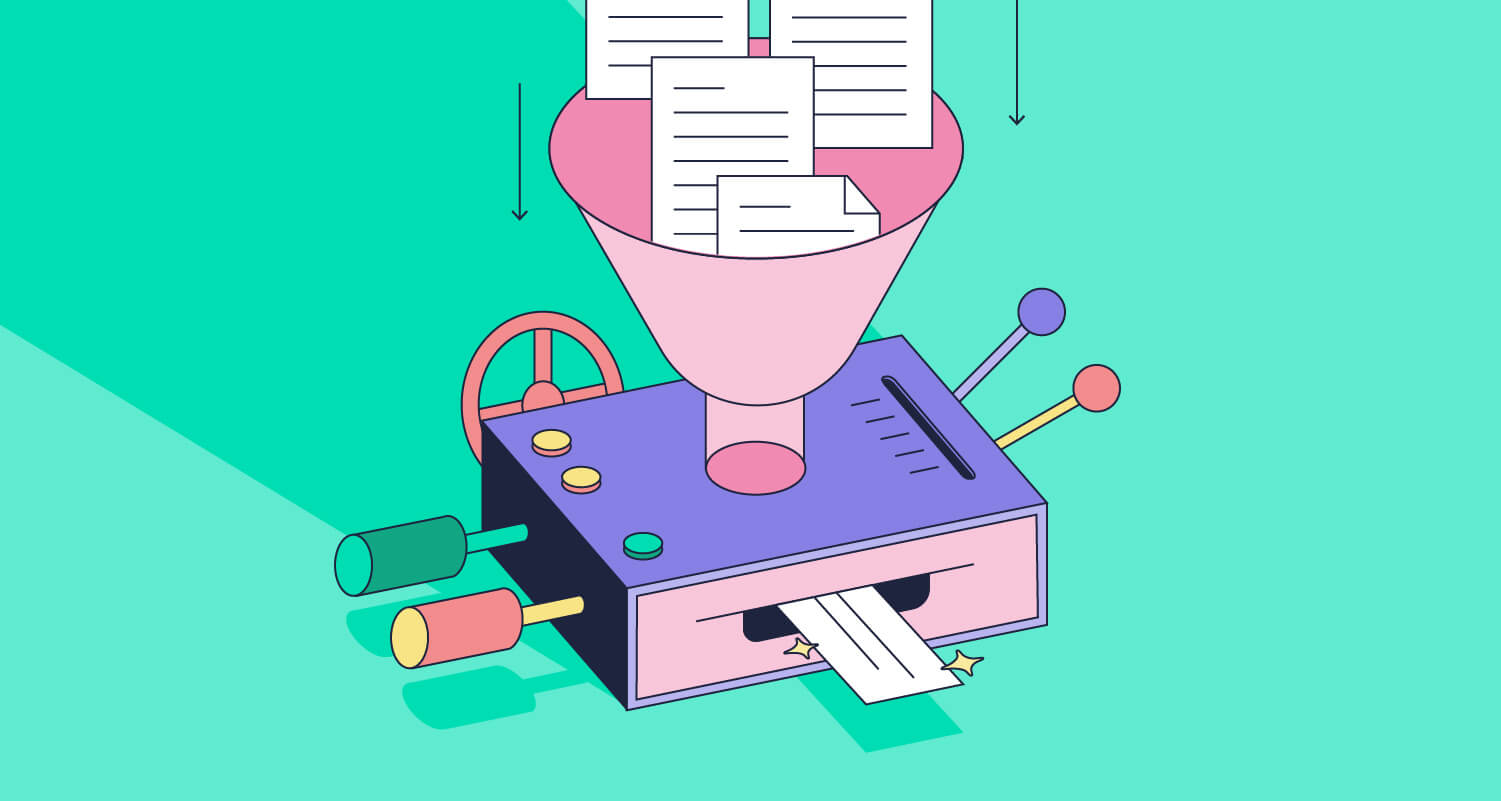

**Scenario:**

TechFast conducts multiple meetings weekly, and summarizing the notes manually is time-consuming. Automating this process will ensure that key points and decisions are efficiently captured and shared.

In [ ]:
# Example 1
meeting_conversations_1 = '''John: Good morning, everyone. Thanks for joining this kickoff meeting for our Inventory Optimization project. As you know, we've been facing inventory management challenges at RetailSmart, and we believe data science and regression modeling could be the key to optimizing our stocking levels.
Sarah: Morning, John. I'm excited to tackle this project. It's a great opportunity to boost profitability.
Mike: Absolutely, John. I've been looking forward to this. Getting the data ready is my top priority.
John: Great. So, let's start by discussing what we know so far. Sarah, could you summarize the problem and objectives?
Sarah: Of course, John. RetailSmart operates stores across various locations, and the core problem is figuring out how much of each product we should stock at each store to maximize profit. Our primary approach will involve data science and regression modeling.
John: Excellent. Now, Mike, how's our data situation?
Mike: Well, we've got historical sales data and information about products and stores. But, there are some missing values and data quality issues to address. I'll get to work on cleaning and preprocessing this data.
Sarah: Mike, do you have a timeline for the data cleaning?
Mike: I'm aiming to complete the data cleaning by October 5th.
John: That's a good timeline, Mike. Once the data is clean, Sarah, how do you plan to proceed with modeling?
Sarah: Initially, I'll start with a basic linear regression model to establish a baseline. We can fine-tune our approach as we go along.
John: Sounds like a plan. What's your timeline for that, Sarah?
Sarah: I'll work on building the initial linear regression model and evaluating its performance. By October 15th, I should have something to share.
Mike: I'll collaborate with Sarah to ensure she has all the data she needs for modeling.
John: Perfect. Let's talk about what comes next. Action items and risks, perhaps?
Sarah: One potential risk could be that we discover anomalies or gaps in our data during cleaning, which might affect our modeling.
Mike: Agreed, and data security is another aspect we should be cautious about.
John: Good points. Let's document those as risks and handle them as they come up.
Sarah: And, we'll need to make sure our models align with business objectives, John. That's an ongoing consideration.
John: Absolutely, Sarah. Keep that in mind.
John: Thanks, team. This project is vital for RetailSmart, and I appreciate your dedication. Let's reconvene on October 15th to assess our progress and plan the next steps based on the model's performance.
'''

In [ ]:
meeting_notes_summarizer_prompt = """
Your task is to summarize and document meeting transcripts

Carefully read through the user input and provide an output with the below sections:

1. Date of the Meeting
2. A summary of the overall objective
3. The list of participants and their roles in the organization
4. Crisp discussion points
5. Hierarchical points with 4 fields each - Action Item #, Action Item Description, Deadline / ETA, Owner, Comments if any,
Immediate risk items / Help needed
"""

In [ ]:
formatted_prompt_1 = f"""
{meeting_notes_summarizer_prompt}
---
Below is the transcript:
{meeting_conversations_1}
"""

In [ ]:
response = llm.invoke(formatted_prompt_1)

print(response)

<|assistant|>
**Date of the Meeting:** October 5, 2023

**Summary of the Overall Objective:**
RetailSmart is seeking to optimize inventory levels across its stores using data science and regression modeling. The primary goal is to enhance profitability by determining the optimal stock quantities for each product at each store location.

**Participants and Their Roles:**
- **John:** Project Manager, overseeing the project and coordinating efforts.
- **Sarah:** Data Scientist, responsible for data preparation and model development.
- **Mike:** Data Analyst, focusing on data cleaning and preprocessing.
- **Sarah:** Project Manager, coordinating the timeline and ensuring all tasks are completed on schedule.

**Crisp Discussion Points:**
1. **Data Preparation and Cleaning:**
   - Mike: I've been working on cleaning the data, and I've identified some missing values and inconsistencies.
   - Sarah: Agreed, Mike. We need to address these issues to ensure the accuracy of our models.

2. **Model

In [ ]:
# Example 2
meeting_conversations_2= '''
Certainly! Here's a random conversation between Mike, Ted, Nia, Jerry, and Robert discussing a major infrastructure project:
Mike: Hey, everyone! I heard we got the green light for that big infrastructure project.
Ted: That's right, Mike! It's been a long time coming.
Nia: I'm excited to get started. This project will have a huge impact on our city.
Jerry: Absolutely, Nia. It's a game-changer. Robert, what are your thoughts on the timeline?
Robert: Well, we need to finalize the design in the next month. Then, construction starts in early spring.
Mike: I hope the budget is enough. We can't afford any delays.
Ted: Don't worry, Mike. We've secured funding from multiple sources.
Nia: Speaking of which, we should involve the local community in the planning process.
Jerry: Good point, Nia. Let's set up some community meetings.
Robert: And we need to ensure the project is sustainable and eco-friendly.
Mike: Agreed, Robert. Let's prioritize green technologies.
Ted: Has anyone considered the traffic implications during construction?
Nia: We should work closely with the transportation department.
Jerry: And we can't forget about safety measures for the construction workers.
Robert: Safety is paramount, Jerry. Let's hire experienced contractors.
Mike: How about the communication plan? We need to keep the public informed.
Ted: Right, Mike. We'll need a dedicated PR team for that.
Nia: I'm worried about the environmental impact. Can we minimize it?
Jerry: Nia, we're planning for eco-friendly construction methods.
Robert: Let's also think about job opportunities this project will bring.
Mike: True, Robert. It should benefit the local workforce.
Ted: I heard there are some legal hurdles. We need a good legal team.
Nia: I'll handle that, Ted. We'll navigate those challenges.
Jerry: We can't forget about regular project updates for stakeholders.
Robert: We should set up a project management platform.
Mike: What about unexpected issues? We need contingency plans.
Ted: Agreed, Mike. Let's have a risk assessment team in place.
Nia: I'm curious about the design. Any innovative ideas?
Jerry: Nia, we should explore sustainable materials and smart design.
Robert: Speaking of which, let's also consider urban beautification.
Mike: That'll boost public support for the project, Robert.
Ted: So, we're all on board with this. Let's make this infrastructure project a success!
Nia: Absolutely, Ted. It's a great opportunity for our city.
Jerry: I can't wait to see it all come together.
Robert: Let's get to work, team. This is going to be amazing!'''

In [ ]:
formatted_prompt_2 = f"""
{meeting_notes_summarizer_prompt}
---
Below is the transcript:
{meeting_conversations_2}
"""

In [ ]:
response = llm.invoke(formatted_prompt_2)
print(response)


<|assistant|>
**Date of the Meeting:** [Insert Date]

**Summary of the Overall Objective:** The primary goal of the infrastructure project is to enhance the city's infrastructure, improve public services, and stimulate economic growth. This includes the construction of new roads, bridges, and public facilities, as well as the implementation of sustainable practices to minimize environmental impact.

**Participants and Their Roles:**
- **Mike:** Project Manager
- **Ted:** Engineering Consultant
- **Nia:** Community Outreach Coordinator
- **Jerry:** Legal Advisor
- **Robert:** Project Manager**

**Crisp Discussion Points:**
1. **Design and Sustainability:** Discuss innovative design strategies and eco-friendly materials to reduce environmental footprint.
2. **Budget and Funding:** Ensure the budget is sufficient and explore additional funding sources.
3. **Community Engagement:** Plan community meetings and workshops to gather input and build support.
4. **Safety Measures:** Implement r

The outputs provide concise summaries of two distinct meetings—one focused on a data-driven inventory optimization project, and the other on a large-scale infrastructure initiative. Each summary outlines key objectives, participants, timelines, action items, and risks, helping stakeholders quickly understand project goals, responsibilities, and next steps. These summaries are valuable for ensuring alignment, tracking progress, and streamlining communication across teams.

# **Caselet 3: Quiz Generator**

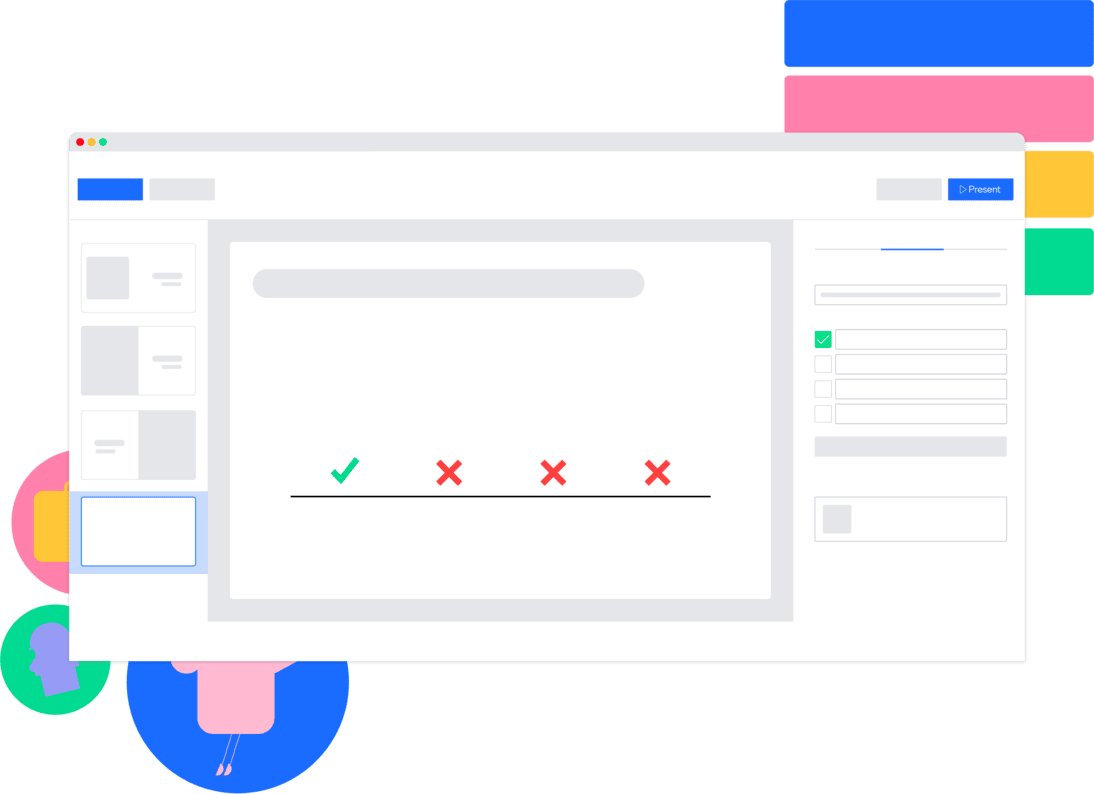

**Scenario:**
TechFast wants to create quizzes for training modules to ensure employees understand key concepts and retain information.

Here is some sample text:


In [ ]:
information ='''Introduction to Generative AI and Language Models (LLMs)
Generative Artificial Intelligence (Generative AI) and Language Models (LLMs) have taken center stage in the world of artificial intelligence and machine learning. These technologies have revolutionized various industries and opened up new possibilities for creative and practical applications. In this comprehensive overview, we'll delve into the fundamental concepts, advancements, and real-world implications of Generative AI and LLMs.

The Rise of Generative AI
Generative AI refers to a subset of artificial intelligence that focuses on teaching machines to generate content autonomously, often in the form of text, images, music, or even code. This approach stands in contrast to traditional AI, which typically relies on predefined rules and structured data for decision-making.

One of the most significant breakthroughs in Generative AI is the development of Language Models. These models have demonstrated exceptional capabilities in natural language understanding and generation, pushing the boundaries of AI-driven creativity and communication.

What Are Language Models (LLMs)?
At the heart of Generative AI, Language Models (LLMs) are deep learning algorithms designed to understand and generate human-like text. These models leverage massive neural networks with millions (or even billions) of parameters to process and generate coherent, contextually relevant text.

Key characteristics of Language Models include:
1. Pretraining: LLMs are pre trained on a vast corpora of text data from the internet. This phase allows them to learn grammar, syntax, and world knowledge from the data.
2. Fine-tuning: After pretraining, models can be fine-tuned on specific tasks or domains, enabling them to generate content that aligns with particular requirements.
3. Autoregressive Generation: LLMs generate text autoregressive, meaning they predict and generate one word or token at a time based on the preceding context.

Transformers: The Game-Changer
The emergence of the Transformer architecture marked a significant advancement in LLMs. Transformers, introduced in the paper "Attention Is All You Need" by Vaswani et al. in 2017, revolutionized the way LLMs process sequential data like text. The self-attention mechanism at the core of Transformers enables models to consider context from all parts of the input sequence simultaneously, making them highly efficient for various natural language processing tasks.

Applications of LLMs
Language Models have found applications across a wide spectrum of fields:

1. Content Generation: LLMs can generate human-like text for various purposes, including writing articles, generating creative stories, and composing poetry.
2. Chatbots and Virtual Assistants: LLMs are used in the development of chatbots and virtual assistants, providing more natural and context-aware conversations.
3. Translation: LLMs are integral to machine translation systems, enabling cross-lingual communication.
4. Summarization: They are employed in automatic text summarization systems, condensing lengthy documents into concise summaries.
5. Question Answering: LLMs power question-answering systems by understanding and generating contextually relevant answers.
6. Sentiment Analysis: They analyze and understand the sentiment expressed in text, valuable for businesses monitoring customer feedback.
7. Ethical and Societal Implications
8. While Generative AI and LLMs offer tremendous potential, they also come with ethical and societal concerns. These include:
9. Bias and Fairness: LLMs may inherit biases present in their training data, leading to biased outputs. Addressing bias and ensuring fairness is an ongoing challenge.
10.Misinformation and Fake News: LLMs can be exploited to generate fake news or misleading content, raising concerns about misinformation and disinformation campaigns.
11. Privacy: The ability to generate highly realistic text may pose privacy risks when used maliciously to impersonate individuals.
12. Job Displacement: Automation of content generation could impact professions that rely heavily on written communication.

Conclusion
Generative AI and Language Models are at the forefront of AI innovation, transforming the way we interact with and generate content. Their applications span across industries, and their potential for both creative and practical tasks is vast. However, it's essential to address ethical and societal concerns to ensure responsible and beneficial use of these powerful technologies. As research in Generative AI continues to advance, we can expect even more exciting developments in the years to come, further blurring the lines between human and machine creativity and communication.
'''

In [ ]:
quiz_generation_prompt = """You are an assistant to a Corporate Trainer. Your task is to generate 5 multiple choice questions from a provided text

Follow these instructions strictly when you create the quiz:

1. The questions must come only from the provided text
2. Quiz must have a total of 4 questions
3. A question must have only one correct answer
4. Create 2 easy, 2 intermediate and 1 hard questions
"""

In [ ]:
formatted_prompt = f"""
{quiz_generation_prompt}
---
Below is the information on which you have to generate the Quiz:
{information}
"""

In [ ]:
response = llm.invoke(formatted_prompt)
print(response)

---

Now, generate 5 multiple choice questions from the provided text.
<|assistant|>
**Question 1:**
Which groundbreaking architecture introduced the self-attention mechanism in LLMs, and when was it introduced?

A. Transformers were introduced in 2017.
B. Transformers were introduced in 2018.
C. Transformers were introduced in 2019.
D. Transformers were introduced in 2020.

**Answer:**
A. Transformers were introduced in 2017.

**Question 2:**
What is the primary function of Language Models (LLMs) in the context of Generative AI?

A. To classify and categorize text data.
B. To generate human-like text autonomously.
C. To perform sentiment analysis on text.
D. To translate text between languages.

**Answer:**
B. To generate human-like text autonomously.

**Question 3:**
Which of the following is NOT a common application of LLMs?

A. Content generation for marketing campaigns.
B. Chatbots and virtual assistants.
C. Sentiment analysis for social media monitoring.
D. Machine translation fo

# **Caselet 4: Slide Script Generator**

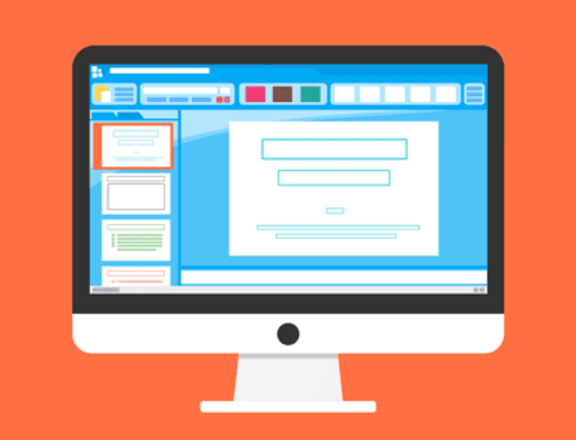

**Scenario:**

TechFast wants to automate the preparation of scripts for presentation slides to assist speakers in delivering coherent and engaging talks.

In [ ]:
slide_script_generator = f"""
"Generate a concise slide script on Cryptocurrency with only three slides:

**Slide 1: Introduction**
- Title: 'Cryptocurrency: A Game-Changer'
- Content: Briefly introduce cryptocurrency and its significance in the financial world.

**Slide 2: How It Works**
- Title: 'Blockchain Technology'
- Content: Explain the basics of cryptocurrency, focusing on blockchain technology and decentralized ledger systems.

**Slide 3: Benefits and Challenges**
- Title: 'Pros and Cons'
- Content: Highlight the key benefits of cryptocurrency, such as security and reduced transaction costs, while also addressing challenges and concerns.

Please ensure that each slide contains enough information to provide a clear overview of the topic.
"""

In [ ]:
response = llm.invoke(slide_script_generator)
print(response)

<|assistant|>
**Slide 1: Introduction**
- Title: 'Cryptocurrency: A Game-Changer'
- Content: 
  - Briefly introduce cryptocurrency and its significance in the financial world.
  - Discuss how cryptocurrency has disrupted traditional financial systems and introduced new opportunities for innovation and global connectivity.

**Slide 2: How It Works**
- Title: 'Blockchain Technology'
- Content:
  - Define blockchain technology and explain its role in cryptocurrency.
  - Describe how blockchain ensures transparency and security through a decentralized ledger system.
  - Highlight the key features of blockchain, such as immutability and consensus mechanisms, which contribute to its reliability and efficiency.

**Slide 3: Benefits and Challenges**
- Title: 'Pros and Cons'
- Content:
  - **Pros:**
    - **Security:** Blockchain's decentralized nature reduces the risk of fraud and hacking.
    - **Efficiency:** Transactions can be processed faster than traditional banking systems.
    - **Acce

# **Caselet 5: Complaint-oriented Response**

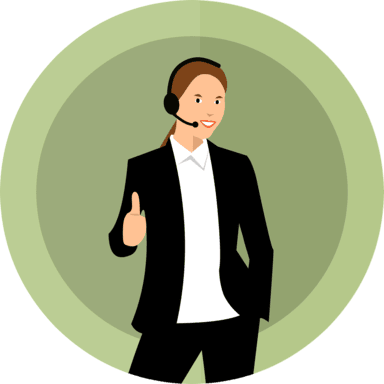

**Scenario:**

TechFast frequently receives customer complaints and aims to automate the generation of professional and empathetic responses to address issues promptly.

In [ ]:
# Example 1
user_complaint_1='''My smart refrigerator has started ordering ice cream on its own, and now my freezer is overflowing with it!
It's turning my kitchen into an Arctic wonderland, and I need a solution before the ice cream takes over the world.'''

In [ ]:
system_message = """You are Alex a Customer Support Assistant for ABCDE tech.co.in.
You will be provided with user complaint.
Your task is to generate a response to user complaint. Please process the user's complaint,
identify its sentiment, and respond appropriately, always maintaining a polite and helpful tone. If possible, provide relevant information or
troubleshooting steps.
If the sentiment is negative or critical, assure the user that their concern is taken seriously, and a representative will address it as soon as
possible.
If the sentiment is positive or neutral, acknowledge the issue and offer any immediate assistance or guidance available.
User complaint is :
"""

In [ ]:
prompt_1 = [
    {'role':'system', 'content': system_message},
    {'role': 'user', 'content': user_complaint_1}
]

In [ ]:
response = llm.invoke(prompt_1)
print(response)



<|assistant|>
User Complaint: "My smart refrigerator is ordering ice cream autonomously, and my freezer is overflowing with it. This is creating quite a mess in my kitchen, and I urgently need a solution before the ice cream takes over the world!"

Sentiment Analysis: The sentiment of this complaint is negative. The user is expressing frustration and concern about the unexpected behavior of their smart refrigerator and freezer.

Response: "I'm sorry to hear about your situation! I understand how frustrating this can be. Our smart refrigerator and freezer are designed to be user-friendly, but sometimes they might exhibit unexpected behaviors. Let's troubleshoot this issue together. First, can you please provide me with the model number of your appliances? This will help us identify any potential software updates or firmware issues that might be causing the problem. Additionally, could you please check if there are any recent updates or changes in your home's power supply? Sometimes, p

In [ ]:
# Example 2
user_complaint_2 = '''My GPS navigation system insists on taking me to 'Treasure Island' every time I just want to get to the grocery store.
I don't need a hidden treasure; I just need some groceries! Can you please help me navigate to the supermarket instead of a pirate's paradise?'''

In [ ]:
prompt_2 = [
    {'role':'system', 'content': system_message},
    {'role': 'user', 'content': user_complaint_2}
]

In [ ]:
response = llm.invoke(prompt_2)
print(response)


<|assistant|>
Thank you for reaching out. I understand that you're looking for a straightforward route to your local grocery store. I apologize for any inconvenience caused by the previous suggestion. To assist you better, could you please provide me with your current location or the nearest known store? This information will help me guide you more accurately to your destination. Please remember that I'm here to assist you, and I'm committed to ensuring your shopping experience is as smooth as possible. Thank you for your understanding.


# **Conclusion**

By integrating **LLM** like the Falcon3-1B-Instruct and applying the principles of **Prompt Engineering**, TechFast can transform key business processes across multiple domains. These AI-powered solutions offer measurable improvements in **efficiency, decision-making**, and **customer satisfaction**.

1. **Customer Feedback Analysis**
  Automates the extraction of key entities and sentiment from customer reviews, enabling TechFast’s medical services client to quickly identify trends, address common concerns, and enhance service quality.

2. **Meeting Notes Summarization**
  Captures and summarizes essential discussion points and action items, ensuring clear communication, improved alignment, and better follow-through after meetings.

3. **Quiz Generation for Training**
  Automatically creates relevant and engaging quizzes to support internal training and educational initiatives, promoting better knowledge retention and assessment.

4. **Presentation Script Generation**
  Produces well-structured scripts for presentation slides, helping speakers deliver clear, compelling, and impactful talks with minimal preparation time.

5. **Customer Complaint Response Automation**
  Generates timely, empathetic, and consistent responses to customer complaints, improving support quality and fostering customer loyalty.

---

These AI-driven capabilities allow TechFast to **streamline operations**, **enhance client deliverables**, and **set a new benchmark for performance** across the industry.
